start image blending


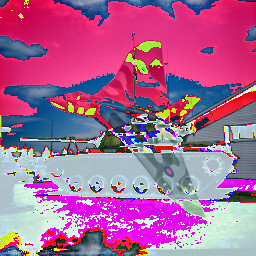

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import numpy as np
import random
import glob
import os
import  torch

filename3 = '/home/ngoc/data2/P2/universal_pytorch/warplane/example_1.jpg'
filename4 = '/home/ngoc/data2/P2/universal_pytorch/warplane/example_5.jpg'
filename = '/home/ngoc/data2/P2/universal_pytorch/example_data/img_blend/example_blend_11_7.jpg'
filename1 = '/home/ngoc/data2/P2/universal_pytorch/example_data/class_0_example_11.png'
save_path =  '/home/ngoc/data2/P2/universal_pytorch/img_blend1/'
save_path_traffic =  '/home/ngoc/data2/P2/universal_pytorch/example_data/img_blend/'

def data_input_init():
    mean = [ 0.485, 0.456, 0.406 ]
    std = [ 0.229, 0.224, 0.225 ]
    tf = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean = mean,
                         std = std)])

#     v = (torch.rand(1,3,224,224).cuda()-0.5)*2*xi
    return (mean,std,tf)

# read in images
def img_blending(filename, filename1 ):
    print('start image blending')
    mean, std,tf = data_input_init()
    x_plane, x_tank = Image.open(filename),Image.open(filename1)
#     print(tf(x_plane))
    p_resize, t_resize  = transforms.Resize((256,256))(x_plane), transforms.Resize((256,256))(x_tank)
#     p_resize, t_resize  =  tf(x_plane), tf(x_tank)

    x_plane_np = np.array(p_resize)
    x_tank_np = np.array(t_resize)

#     print(np.amax(np.array(x_tank)))
#     print(np.amin(np.array(x_tank)))
    img_blend_temp = x_plane_np + x_tank_np
    img_blend_temp = np.clip(img_blend_temp, 0,255)
#     img_blend_2 = torch.clamp((p_resize+t_resize),0,1)
    img_blend = Image.fromarray(np.uint8(img_blend_temp))
#     Image.fromarray(np.uint8(img_blend_temp)).save(os.path.join(
#         save_path,"example_blend_" + os.path.basename(filename).split('.')[-2] \
#             +os.path.basename(filename1).split('.')[-2]+'_'+str('pre5')+'.jpg'))
#     print(type(img_blend))
    return img_blend


img_blending(filename3, filename4)


In [ ]:
p_resize